In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv

In [2]:
pv.set_jupyter_backend('pythreejs')
pv.start_xvfb() #start backend xserver

In [3]:
x=np.linspace(-1,1,50)
y=x
z=np.outer(x,y)
z

array([[ 1.        ,  0.95918367,  0.91836735, ..., -0.91836735,
        -0.95918367, -1.        ],
       [ 0.95918367,  0.92003332,  0.88088297, ..., -0.88088297,
        -0.92003332, -0.95918367],
       [ 0.91836735,  0.88088297,  0.84339858, ..., -0.84339858,
        -0.88088297, -0.91836735],
       ...,
       [-0.91836735, -0.88088297, -0.84339858, ...,  0.84339858,
         0.88088297,  0.91836735],
       [-0.95918367, -0.92003332, -0.88088297, ...,  0.88088297,
         0.92003332,  0.95918367],
       [-1.        , -0.95918367, -0.91836735, ...,  0.91836735,
         0.95918367,  1.        ]])

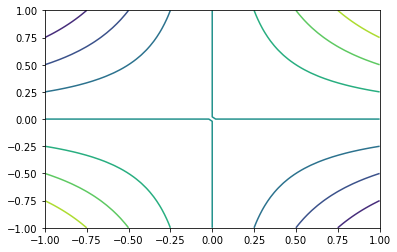

In [4]:
plt.figure()
plt.contour(x,y,z)

### Coordinates creating

In [5]:
# Cells number
nx, ny, nz = 50, 2, 3
nx+=1
ny+=1
nz+=1

In [6]:
x = np.arange(0, nx)

x = np.repeat(x, 2)
x = x[1:-1]

x = np.repeat(x, 1)
x = np.tile(x, (ny * 2 - 2) * (nz * 2 - 2))

In [7]:
y = np.arange(0, ny)

y = np.repeat(y, 2)
y = y[1:-1]

y = np.repeat(y, nx * 2 - 2)
y = np.tile(y, nz * 2 - 2)

In [8]:
z = np.arange(0, nz)

z = np.repeat(z, 2)
z = z[1:-1]

z = np.repeat(z, (nx * 2 - 2) * (ny * 2 - 2))
z = np.tile(z, 1)

In [9]:
mesh_cord = np.stack((x, y, z))
mesh_cord = mesh_cord.transpose()

In [10]:
(nx-1)*(ny-1)*(nz-1)

300

In [11]:
dimension = np.asarray((nx, ny, nz))
grid = pv.ExplicitStructuredGrid(dimension, mesh_cord)

point_data= np.linspace(0,10,nx*ny*nz)
grid.point_data['Point data']= point_data

cell_data= np.linspace(0,10,(nx-1)*(ny-1)*(nz-1))
grid.cell_data['Cell data']= cell_data

grid.set_active_scalars('Cell data')
plot = pv.Plotter()
plot.add_mesh(grid)
# grid = grid.compute_connectivity()
grid.plot(show_edges=True)
grid

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(intensity=0.25, positi…

ExplicitStructuredGrid (0x7f7f978c9580)
  N Cells:	300
  N Points:	612
  X Bounds:	0.000e+00, 5.000e+01
  Y Bounds:	0.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 3.000e+00
  N Arrays:	2